In [1]:
import tensorflow as tf
import numpy as np
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [2]:
N_FEATURES = 10
N_DENSE_NEURONS = 3

x * w + b

In [3]:
x = tf.placeholder(tf.float32, (None, N_FEATURES)) # (Samples, Features)
W = tf.Variable(tf.random_normal([N_FEATURES, N_DENSE_NEURONS])) #Random weights
b = tf.Variable(tf.ones([N_DENSE_NEURONS])) # Bias can be 0 or 1 for this example

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
xW = tf.matmul(x, W)
z = tf.add(xW, b)
#Activation function:
a = tf.sigmoid(z)

In [5]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(a, feed_dict={x:np.random.randn(1, N_FEATURES)})
print(result)

[[0.24514784 0.921382   0.12531395]]


We have only run this once, so our network isn't "learning", we now need to adjust `w` and `b` with a cost function

### Simple Regession Example:

In [6]:
x_data = np.linspace(0, 10, 20) + np.random.uniform(-1.5, 1.5, 20)

In [7]:
df(x_data)[:5]

,0
0,1.273859
1,-0.219085
2,0.935361
3,2.657476
4,1.570206


In [8]:
y_label = np.linspace(0, 10, 20) + np.random.uniform(-2, 2, 20)

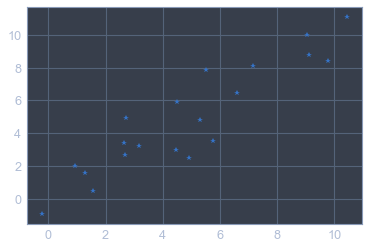

In [9]:
plt.plot(x_data, y_label, '*')

Tying to solve:

y = mx + b

In [10]:
np.random.rand(2)

array([0.59257208, 0.68291231])

In [36]:
m = tf.Variable(-1.0)
b = tf.Variable(1.0)

In [37]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2 # We want to minimize this error
    


In [38]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [39]:
init = tf.global_variables_initializer()

In [56]:
with tf.Session() as sess:
    sess.run(init)
    TRAINING_STEPS = 100
    
    for i in range(TRAINING_STEPS):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [57]:
print(final_slope, final_intercept)

0.92209363 0.5012601


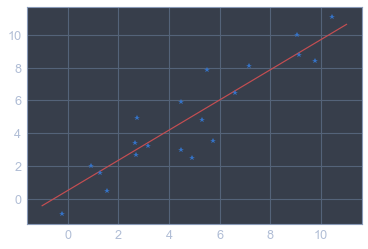

In [58]:
x_test = np.linspace(-1, 11, 10)
y_pred = final_slope * x_test + final_intercept
plt.plot(x_test, y_pred, 'r')
plt.plot(x_data, y_label, '*')